## GOAL: Predict the 'total_cases' label for each (city, year, weekofyear) in the test set.

In [9]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [10]:
#From blog - https://www.drivendata.co/blog/dengue-benchmark/

def preprocess_data(data_path, labels_path=None):
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0, 1, 2])
    
    # select features we want
    features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 
                 'station_min_temp_c', 
#                 'total_cases_1WLag',
#                 'total_cases_2WLag',
#                 'Average_3WLag_Cases',
#                 'expected_avg3wlagcasesbyweek',
                 'ndvi_se',
                 'reanalysis_tdtr_k'
                  ]
    df = df[features]
    
    # fill missing values = impute
    
    #forward fill
    #df.fillna(method='ffill', inplace=True)

    #simple impute with median
    #missing_values should be set to np.nan, since pd.NA will be converted to np.nan
    #simple_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    #data_with_imputed_values = simple_imputer.fit_transform(df)
    
    #KNN imputer = K-nearest neighbor
    #Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.
    #knn_imputer = KNNImputer(n_neighbors=2)
    #data_with_imputed_values = knn_imputer.fit_transform(df)
        
    #A more sophisticated approach is to use the IterativeImputer class, 
    #which models each feature with missing values as a function of other features, 
    #and uses that estimate for imputation. 
    #It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y 
    #and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. 
    #Then, the regressor is used to predict the missing values of y. 
    #This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. 
    #The results of the final imputation round are returned.
    
    #Note This estimator is still experimental for now: 
    #default parameters or details of behaviour might change without any deprecation cycle
    imp_imputer = IterativeImputer(max_iter=10, random_state=0)  
    imp_imputer.fit(df)
    IterativeImputer(random_state=0)
    data_with_imputed_values = imp_imputer.transform(df)
    
    #Output of sklearn imputers in a numpy array. Convert it to pandas dataframe
    idf = pd.DataFrame(data_with_imputed_values)
    idf.columns=df.columns
    idf.index=df.index
    
    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        #df = df.join(labels)
        idf = idf.join(labels)
    
    # separate san juan and iquitos
    #sj = df.loc['sj']
    #iq = df.loc['iq']
    sj = idf.loc['sj']
    iq = idf.loc['iq']    
    
    return sj, iq

## NOTE: Various imputation methods have no impact on RMSE score for this data. No need to spend more time exploring imputation techniques for now.

In [11]:
sj_train, iq_train = preprocess_data(r"C:\Users\FunTime\Desktop\DengAI_Competetion\From_Rupa\dengue_features_train_mod_4.csv",
                                    labels_path="C:\\Users\\FunTime\\Desktop\\DengAI_Competetion\dengue_labels_train.csv")

In [12]:
sj_train.describe()

,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k,station_avg_temp_c,station_min_temp_c,ndvi_se,reanalysis_tdtr_k,total_cases
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,16.553614,295.110396,27.007603,22.597868,0.177707,2.529877,34.180556
std,1.555980,1.564936,1.410991,1.501888,0.056604,0.527946,51.381372
min,11.715714,289.642857,22.842857,17.800000,-0.015533,1.357143,0.000000
25%,15.248214,293.853214,25.842857,21.700000,0.140121,2.157143,9.000000
50%,16.832143,295.447143,27.214286,22.800000,0.177264,2.457143,19.000000
75%,17.854286,296.415714,28.175000,23.900000,0.211596,2.800000,37.000000
max,19.440000,297.795714,30.071429,25.600000,0.393129,5.314705,461.000000


In [13]:
iq_train.describe()

,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k,station_avg_temp_c,station_min_temp_c,ndvi_se,reanalysis_tdtr_k,total_cases
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,17.093412,295.491084,27.516117,21.212693,0.249883,9.173313,7.565385
std,1.440514,1.411922,0.931188,1.258203,0.077198,2.469252,10.765478
min,12.111429,290.088571,21.400000,14.700000,0.029880,3.714286,0.000000
25%,16.121429,294.596429,27.000000,20.600000,0.194748,7.353571,1.000000
50%,17.420714,295.831429,27.600000,21.400000,0.249593,8.942857,5.000000
75%,18.176786,296.544643,28.100000,22.000000,0.302129,11.003571,9.000000
max,20.461429,298.450000,30.800000,24.200000,0.538314,16.028571,116.000000


In [16]:
from sklearn.model_selection import train_test_split

labels = pd.read_csv(r"C:\\Users\\FunTime\\Desktop\\DengAI_Competetion\dengue_labels_train.csv", index_col=[0, 1, 2])
sj_labels = labels.loc['sj']
iq_labels = labels.loc['iq'] 
    
# Split the dataset in 80% (train), 20% (test) ratio
#sj_train_subtrain_X, sj_train_subtest_x, sj_target_subtrain_Y, sj_target_subtest_y = train_test_split(sj_train, sj_train.total_cases, test_size=0.2, random_state=0)
#iq_train_subtrain_X, iq_train_subtest_x, iq_target_subtrain_Y, iq_target_subtest_y = train_test_split(iq_train, iq_train.total_cases, test_size=0.2, random_state=0)

sj_train_subtrain_X, sj_train_subtest_x, sj_target_subtrain_Y, sj_target_subtest_y = train_test_split(sj_train, sj_labels, test_size=0.2, random_state=0)
iq_train_subtrain_X, iq_train_subtest_x, iq_target_subtrain_Y, iq_target_subtest_y = train_test_split(iq_train, iq_labels, test_size=0.2, random_state=0)

#print(type(sj_train_subtrain_X))
print(sj_train_subtrain_X.shape)
print(sj_train_subtrain_X.columns)
#print(sj_train_subtrain_X.index)
#sj_train_subtrain_X.drop(columns=['fitted', 'total_cases'], inplace=True)
sj_train_subtrain_X.drop(columns=['total_cases'], inplace=True)
print(sj_train_subtrain_X.columns)

#print(type(sj_train_subtest_x))
print(sj_train_subtest_x.shape)
print(sj_train_subtest_x.columns)
#print(sj_train_subtest_x.index)
#sj_train_subtest_x.drop(columns=['fitted', 'total_cases'], inplace=True)
sj_train_subtest_x.drop(columns=['total_cases'], inplace=True)
print(sj_train_subtest_x.columns)

print(type(sj_target_subtrain_Y))
print(sj_target_subtrain_Y.shape)
print(sj_target_subtrain_Y.columns)

print(type(sj_target_subtest_y))
print(sj_target_subtest_y.shape)
print(sj_target_subtest_y.columns)

#print(type(iq_train_subtrain_X))
print(iq_train_subtrain_X.shape)
print(iq_train_subtrain_X.columns)
#print(iq_train_subtrain_X.index)
#iq_train_subtrain_X.drop(columns=['fitted', 'total_cases'], inplace=True)
iq_train_subtrain_X.drop(columns=['total_cases'], inplace=True)
print(iq_train_subtrain_X.columns)

#print(type(iq_train_subtest_x))
print(iq_train_subtest_x.shape)
print(iq_train_subtest_x.columns)
#print(iq_train_subtest_x.index)
#iq_train_subtest_x.drop(columns=['fitted', 'total_cases'], inplace=True)
iq_train_subtest_x.drop(columns=['total_cases'], inplace=True)
print(iq_train_subtest_x.columns)

print(type(iq_target_subtrain_Y))
print(iq_target_subtrain_Y.shape)
print(iq_target_subtrain_Y.columns)

print(type(iq_target_subtest_y))
print(iq_target_subtest_y.shape)
print(iq_target_subtest_y.columns)

print("SJ Train shape, SJ Test shape", sj_train_subtrain_X.shape, sj_train_subtest_x.shape)
print("IQ Train shape, IQ Test shape", iq_train_subtrain_X.shape, iq_train_subtest_x.shape)

print("SJ Target shape, SJ Test shape", sj_target_subtrain_Y.shape, sj_target_subtest_y.shape)
print("IQ Target shape, IQ Test shape", iq_target_subtrain_Y.shape, iq_target_subtest_y.shape)

(748, 7)
Index(['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
       'station_avg_temp_c', 'station_min_temp_c', 'ndvi_se',
       'reanalysis_tdtr_k', 'total_cases'],
      dtype='object')
Index(['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
       'station_avg_temp_c', 'station_min_temp_c', 'ndvi_se',
       'reanalysis_tdtr_k'],
      dtype='object')
(188, 7)
Index(['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
       'station_avg_temp_c', 'station_min_temp_c', 'ndvi_se',
       'reanalysis_tdtr_k', 'total_cases'],
      dtype='object')
Index(['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
       'station_avg_temp_c', 'station_min_temp_c', 'ndvi_se',
       'reanalysis_tdtr_k'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
(748, 1)
Index(['total_cases'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
(188, 1)
Index(['total_cases'], dtype='object')
(416, 7)
Ind

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [48]:
#sj_train_subtrain_X, sj_train_subtest_x, sj_target_subtrain_Y, sj_target_subtest_y
sj_train_subtrain_X, sj_target_subtrain_Y = make_regression(n_features=6, random_state=0, shuffle=False)
rf_reg = RandomForestRegressor(n_estimators=100, criterion='mae', max_depth=20, min_samples_leaf=200, random_state=3)
sj_reg = rf_reg.fit(sj_train_subtrain_X, sj_target_subtrain_Y)

#sj_reg_score = sj_reg.score(sj_train_subtrain_X, sj_target_subtrain_Y) 
#print(sj_reg_score)
#print(type(sj_train_subtest_x))
#print(sj_train_subtest_x.columns)
sj_target_predict = sj_reg.predict(sj_train_subtest_x)
print(sj_target_predict)
print(sj_target_predict.shape)
#print(sj_target_predict.columns)

iq_train_subtrain_X, iq_target_subtrain_Y = make_regression(n_features=6, random_state=0, shuffle=False)
rf_reg = RandomForestRegressor(n_estimators=100, criterion='mae', max_depth=20, min_samples_leaf=200, random_state=3)
iq_reg = rf_reg.fit(iq_train_subtrain_X, iq_target_subtrain_Y)
#iq_reg_score = iq_reg.score(iq_train_subtrain_X, iq_target_subtrain_Y) 
#print(iq_reg_score)
iq_target_predict = iq_reg.predict(iq_train_subtest_x)
print(iq_target_predict)
print(iq_target_predict.shape)
#print(iq_target_predict.columns)


ValueError: Expected 2D array, got 1D array instead:
array=[ 110.102715     50.25388      46.243484     -3.2692657    93.11305
   18.128244     99.55279     -48.855553    -96.949776      8.9594555
  -47.075417    -81.22052      34.297264    -16.318167    131.30957
    7.231008     44.628506    -48.290043    145.76807       4.5566964
   -5.7173285    20.86869     -37.531963     -4.448392    158.70128
   38.366047     37.390976     56.106396     75.32038     -41.96231
  -54.014935    -61.46684     -31.032274    155.8719       -3.493774
   59.539204      8.38112     -14.471079    -39.806675    -46.435337
  -46.015305     92.09625       0.19276476  -74.89602    -105.368355
  -45.685684     25.192654     -1.4430474    71.2946       20.305944
  -33.356792   -109.019165    -82.043594     -6.1474066   -73.462746
   13.142293    -88.65469     -69.01807      41.493584    -49.914753
   39.780537    -20.568556     41.672394      9.944791    -38.652405
   26.744223     76.88341      52.347797    -30.42821     115.333115
   67.171265    -13.963104     56.202503     47.41906      46.928303
  -39.702065    -80.919754    -20.484497   -123.842896    123.32329
   69.21417      99.627815     94.52373     -59.766495    -34.074333
   84.77096      54.17494    -117.44798    -113.34029     -87.1484
  -17.66791      -1.8334062    46.954964    -95.368614    -36.57934
  -19.328833    -73.34987     -45.411907    -97.401        29.33908   ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

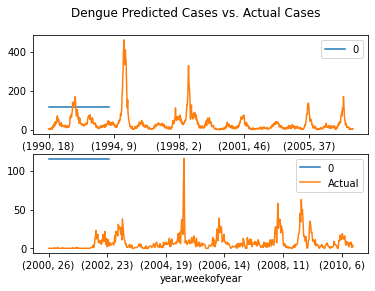

In [46]:
%matplotlib inline
from matplotlib import pyplot as plt

figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
sj_predict_srs = pd.DataFrame(sj_target_predict)
sj_predict_srs.plot(ax=axes[0], label="Predictions")
sj_train.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
iq_predict_srs = pd.DataFrame(iq_target_predict)
iq_predict_srs.plot(ax=axes[1], label="Predictions")
iq_train.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()


In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sj_mse = mean_squared_error(sj_target_subtest_y, sj_target_predict)
sj_rmse = sqrt(sj_mse)
print(sj_rmse)

iq_mse = mean_squared_error(iq_target_subtest_y, iq_target_predict)
iq_rmse = sqrt(iq_mse)
print(iq_rmse)

98.84874347917211
106.90787161332642


In [31]:
from sklearn.metrics import mean_absolute_error
#print("Mean Absolute Error:")
print(mean_absolute_error(sj_target_subtest_y, sj_target_predict))
print(mean_absolute_error(iq_target_subtest_y, iq_target_predict))

94.30096105254165
105.84181160314135


In [22]:
sj_test, iq_test = preprocess_data(r"C:\Users\FunTime\Desktop\DengAI_Competetion\dengue_features_test.csv")

print(sj_test.shape)
print(sj_test.columns)
sj_predictions = sj_reg.predict(sj_test).astype(int)
iq_predictions = iq_reg.predict(iq_test).astype(int)

submission = pd.read_csv(r"C:\Users\FunTime\Desktop\DengAI_Competetion\submission_format.csv",
                         index_col=[0, 1, 2])

submission.total_cases = np.concatenate([sj_predictions, iq_predictions])
submission.to_csv(r"C:\Users\FunTime\Desktop\DengAI_Competetion\benchmark3.csv")

(260, 6)
Index(['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
       'station_avg_temp_c', 'station_min_temp_c', 'ndvi_se',
       'reanalysis_tdtr_k'],
      dtype='object')
